In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import std
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
dataset_dir = 'Dataset_Final/Dataset_unido.csv' #Se carga el dataset
df = pd.read_csv(dataset_dir, sep=(',')) #Se lee el archivo csv el cual está separado por comas
df #Se imprime el dataset

,CodDepartamento,Ano,Trimestre,PorcentajeDesempleo,Temperatura,Precipitacion,PIB,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,PorcentajeVacunacion,Vulnerabilidad_numero,Incidencia
0,5,2020,1,12.9,24.149651,7.957837,46018.0,-12.489606,-8.493907,-11.392832,-9.280287,-5.809319,4.227240,0.00,1.842103,0.000024
1,5,2020,2,25.2,22.286968,5.173339,46018.0,-67.037634,-44.896057,-55.349462,-62.886022,-50.243011,25.524731,0.00,1.842103,0.000825
2,5,2020,3,20.0,22.739094,7.672982,46018.0,-50.040860,-28.913620,-39.594624,-51.555556,-34.839427,17.956272,0.00,1.842103,0.026520
3,5,2020,4,15.2,23.157370,8.176094,46018.0,-28.945878,-3.579928,-27.370968,-28.567742,-19.315054,10.191756,0.00,1.842103,0.033072
4,5,2021,1,17.9,22.285123,6.276447,52347.0,-32.214670,-0.670507,-31.100230,-34.711982,-20.892857,9.510369,0.66,1.842103,0.024737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,88,2020,4,25.3,25.658387,0.000000,1027.0,-57.937993,-29.239427,-60.999642,-41.625090,-32.145878,13.854480,0.00,2.994585,0.014034
188,88,2021,1,16.0,26.667411,0.000000,1300.0,-36.820661,-11.887865,-48.219662,-15.671659,-21.868280,9.530722,0.51,2.994585,0.005350
189,88,2021,2,16.0,28.111204,0.000000,1300.0,-23.432616,-3.455914,-47.115412,-0.963082,-16.767384,11.880645,13.53,2.994585,0.061390
190,88,2021,3,11.9,23.849370,0.000000,1300.0,1.812545,11.936918,-38.234050,31.749821,-7.212903,6.475986,56.77,2.994585,0.006413


In [3]:
y = df["Incidencia"]
X = df.iloc[:,:-1]
X

,CodDepartamento,Ano,Trimestre,PorcentajeDesempleo,Temperatura,Precipitacion,PIB,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,PorcentajeVacunacion,Vulnerabilidad_numero
0,5,2020,1,12.9,24.149651,7.957837,46018.0,-12.489606,-8.493907,-11.392832,-9.280287,-5.809319,4.227240,0.00,1.842103
1,5,2020,2,25.2,22.286968,5.173339,46018.0,-67.037634,-44.896057,-55.349462,-62.886022,-50.243011,25.524731,0.00,1.842103
2,5,2020,3,20.0,22.739094,7.672982,46018.0,-50.040860,-28.913620,-39.594624,-51.555556,-34.839427,17.956272,0.00,1.842103
3,5,2020,4,15.2,23.157370,8.176094,46018.0,-28.945878,-3.579928,-27.370968,-28.567742,-19.315054,10.191756,0.00,1.842103
4,5,2021,1,17.9,22.285123,6.276447,52347.0,-32.214670,-0.670507,-31.100230,-34.711982,-20.892857,9.510369,0.66,1.842103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,88,2020,4,25.3,25.658387,0.000000,1027.0,-57.937993,-29.239427,-60.999642,-41.625090,-32.145878,13.854480,0.00,2.994585
188,88,2021,1,16.0,26.667411,0.000000,1300.0,-36.820661,-11.887865,-48.219662,-15.671659,-21.868280,9.530722,0.51,2.994585
189,88,2021,2,16.0,28.111204,0.000000,1300.0,-23.432616,-3.455914,-47.115412,-0.963082,-16.767384,11.880645,13.53,2.994585
190,88,2021,3,11.9,23.849370,0.000000,1300.0,1.812545,11.936918,-38.234050,31.749821,-7.212903,6.475986,56.77,2.994585


In [4]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 329)
clf = DecisionTreeRegressor(random_state=0)
clf.fit(X_train, y_train)
predicciones = clf.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("Std: ",std(predicciones))
print(f"El error (rmse) de test es: ", np.sqrt(rmse))
print("R2: ",r2_score(y_test,predicciones))

Std:  0.018151470128259108
El error (rmse) de test es:  0.09499767581734966
R2:  0.736038877260647


## Post - Pruning

In [5]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 6.84934707e-17 9.36083817e-15 1.70631917e-14
 2.32906321e-14 3.40524438e-14 7.36527419e-14 8.90395193e-14
 1.01000213e-13 1.79855594e-13 2.02120696e-13 5.55883991e-13
 5.94071755e-13 8.96937762e-13 1.13439340e-12 2.67641232e-12
 2.97930052e-12 3.11668092e-12 4.53428941e-12 6.99272113e-12
 8.54615722e-12 8.62597878e-12 8.63285259e-12 1.45170960e-11
 1.73392859e-11 1.79539571e-11 1.87801773e-11 2.34120977e-11
 4.02646323e-11 4.58894409e-11 4.81332181e-11 6.97300264e-11
 8.02847461e-11 8.17570658e-11 1.28697729e-10 1.80371250e-10
 1.84750070e-10 2.67331021e-10 2.80412907e-10 2.99534613e-10
 3.01947874e-10 3.01952472e-10 3.57150608e-10 5.09167496e-10
 5.93674483e-10 7.22037066e-10 8.01572325e-10 8.20850369e-10
 1.01118430e-09 1.17829570e-09 1.19390842e-09 1.20547350e-09
 1.24345213e-09 1.43155185e-09 1.80337841e-09 1.81066098e-09
 1.89131495e-09 2.03879237e-09 2.09728742e-09 3.39332616e-09
 3.70107807e-09 4.28376046e-09 4.69760676e-09 4.73515862e-09
 5.20855805e-09 5.507859

In [6]:
clf = DecisionTreeRegressor(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 6.84934707e-17 9.36083817e-15 1.70631917e-14
 2.32906321e-14 3.40524438e-14 7.36527419e-14 8.90395193e-14
 1.01000213e-13 1.79855594e-13 2.02120696e-13 5.55883991e-13
 5.94071755e-13 8.96937762e-13 1.13439340e-12 2.67641232e-12
 2.97930052e-12 3.11668092e-12 4.53428941e-12 6.99272113e-12
 8.54615722e-12 8.62597878e-12 8.63285259e-12 1.45170960e-11
 1.73392859e-11 1.79539571e-11 1.87801773e-11 2.34120977e-11
 4.02646323e-11 4.58894409e-11 4.81332181e-11 6.97300264e-11
 8.02847461e-11 8.17570658e-11 1.28697729e-10 1.80371250e-10
 1.84750070e-10 2.67331021e-10 2.80412907e-10 2.99534613e-10
 3.01947874e-10 3.01952472e-10 3.57150608e-10 5.09167496e-10
 5.93674483e-10 7.22037066e-10 8.01572325e-10 8.20850369e-10
 1.01118430e-09 1.17829570e-09 1.19390842e-09 1.20547350e-09
 1.24345213e-09 1.43155185e-09 1.80337841e-09 1.81066098e-09
 1.89131495e-09 2.03879237e-09 2.09728742e-09 3.39332616e-09
 3.70107807e-09 4.28376046e-09 4.69760676e-09 4.73515862e-09
 5.20855805e-09 5.507859

In [7]:
clf.fit(X_train, y_train)
predicciones = clf.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("Std: ",std(predicciones))
print(f"El error (rmse) de test es: ", np.sqrt(rmse))
print("R2: ",r2_score(y_test,predicciones))

Std:  0.018151470128259108
El error (rmse) de test es:  0.09499767581734966
R2:  0.736038877260647


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

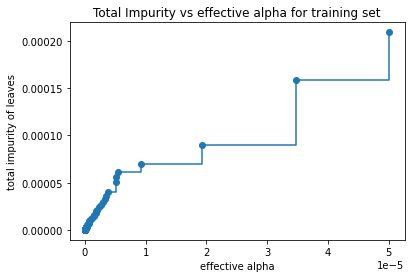

In [8]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [9]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 5.7346374535490244e-05


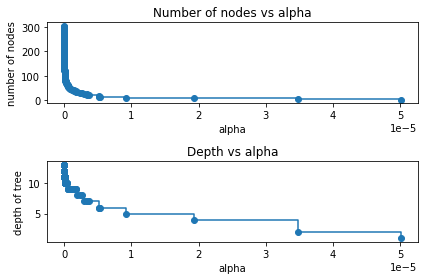

In [10]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

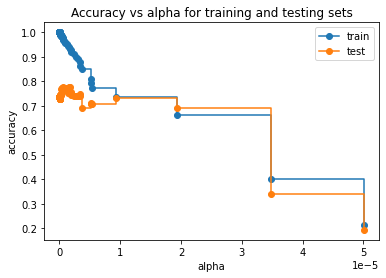

In [11]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

{'ccp_alpha': array([0.00000000e+00, 8.47457627e-07, 1.69491525e-06, 2.54237288e-06,
       3.38983051e-06, 4.23728814e-06, 5.08474576e-06, 5.93220339e-06,
       6.77966102e-06, 7.62711864e-06, 8.47457627e-06, 9.32203390e-06,
       1.01694915e-05, 1.10169492e-05, 1.18644068e-05, 1.27118644e-05,
       1.35593220e-05, 1.44067797e-05, 1.52542373e-05, 1.61016949e-05,
       1.69491525e-05, 1.77966102e-05, 1.86440678e-05, 1.94915254e-05,
       2.03389831e-05, 2.11864407e-05, 2.20338983e-05, 2.28813559e-05,
       2.37288136e-05, 2.45762712e-05, 2.54237288e-05, 2.62711864e-05,
       2.71186441e-05, 2.79661017e-05, 2.88135593e-05, 2.96610169e-05,
       3.05084746e-05, 3.13559322e-05, 3.22033898e-05, 3.30508475e-05,
       3.38983051e-05, 3.47457627e-05, 3.55932203e-05, 3.64406780e-05,
       3.72881356e-05, 3.81355932e-05, 3.89830508e-05, 3.98305085e-05,
       4.06779661e-05, 4.15254237e-05, 4.23728814e-05, 4.32203390e-05,
       4.40677966e-05, 4.49152542e-05, 4.57627119e-05, 4.661016

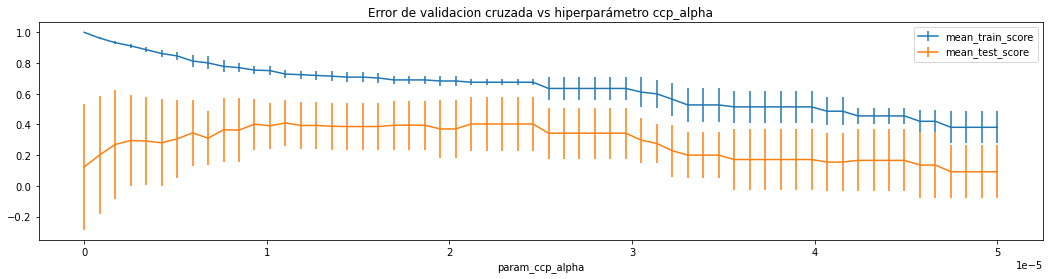

In [12]:
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 0.00005, 60)}
print(param_grid)
# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 298
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(18, 4))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [13]:
grid.best_params_ 

{'ccp_alpha': 1.1016949152542374e-05}

Profundidad del árbol: 5
Número de nodos terminales: 6


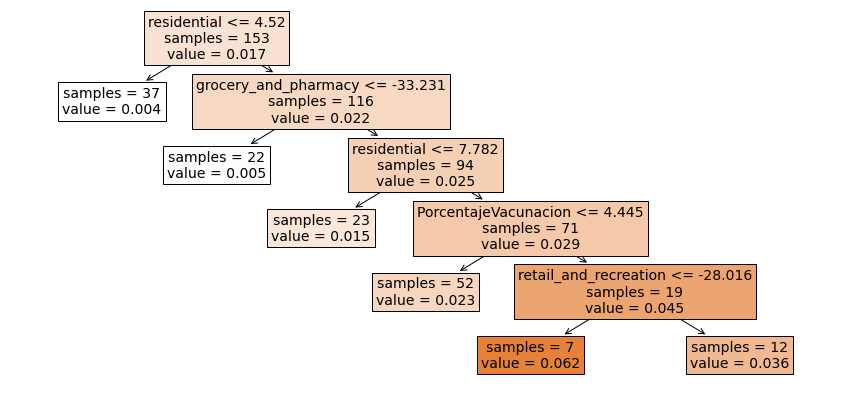

In [14]:
# Estructura del árbol final
# ------------------------------------------------------------------------------
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

fig, ax = plt.subplots(figsize=(15, 7))
plot = plot_tree(
            decision_tree = modelo_final,
            feature_names = df.drop(columns = "Incidencia").columns,
            class_names   = 'Incidencia',
            filled        = True,
            impurity      = False,
            fontsize      = 14,
            ax            = ax
       )

In [15]:
# Error de test del modelo final (tras aplicar pruning)
#-------------------------------------------------------------------------------
predicciones = modelo_final.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("Std: ",std(predicciones))
print(f"El error (rmse) de test es: ", np.sqrt(rmse))
print("R2: ",r2_score(y_test,predicciones))

Std:  0.01652655333197675
El error (rmse) de test es:  0.09540319419196125
R2:  0.7315028323705147


In [16]:
clf_ = DecisionTreeRegressor(random_state=298,ccp_alpha=0.0000006)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)


rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = y_test_pred,
        squared = False
       )
print("Std: ",std(y_test_pred))
print(f"El error (rmse) de test es: ", np.sqrt(rmse))
print("R2: ",r2_score(y_test,y_test_pred))


Std:  0.018626445589477077
El error (rmse) de test es:  0.08690137504708005
R2:  0.8151605617358226


In [17]:
dd = pd.DataFrame()
dd['Valor'] = y_test
dd['Predicho'] = y_test_pred
dd

,Valor,Predicho
185,0.000331,0.008925
104,0.000019,0.000177
133,0.015998,0.038403
127,0.003098,0.003765
89,0.000458,0.001011
52,0.009609,0.014372
51,0.026507,0.030373
5,0.054916,0.069304
23,0.004864,0.000049
45,0.063856,0.069304


In [18]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=13, random_state=298)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=13), n_estimators=150, random_state=298
)

regr_1.fit(X_train,y_train)
regr_2.fit(X_train,y_train)

y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = y_1,
        squared = False
       )
print("Std: ",std(y_1))
print(f"El error (rmse) de test es: ", np.sqrt(rmse))
print("R2: ",r2_score(y_test,y_1))

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = y_2,
        squared = False
       )
print("Std: ",std(y_2))
print(f"El error (rmse) de test es: ", np.sqrt(rmse))
print("R2: ",r2_score(y_test,y_2))

Std:  0.018412949321878806
El error (rmse) de test es:  0.08811736856756108
R2:  0.8045956965156803
Std:  0.016030600488527724
El error (rmse) de test es:  0.08101699760664346
R2:  0.8603655350182059


In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# defining the regressor
model = AdaBoostRegressor(random_state=298)

# creating a dic for the grid
grid = dict()

# estimator till 500
grid['n_estimators'] = [10, 50, 100, 150, 200, 500]

# defining learning rate
grid['learning_rate'] = [0.0001, 0.01, 0.1, 1.0, 1.1, 1.2]


# defining the CV
cv = KFold(n_splits=10)

# initializing the grid search
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv)


# training the model on grid search for hyperparameter tuning of Adaboost
grid_result = grid_search.fit(X_train,y_train)

# finding the best results /hyperparameter tuning of Adaboost
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.560362 using {'learning_rate': 0.1, 'n_estimators': 200}
